# 딥러닝을 이용한 시계열 자료분석
- NASDAQ GS 주식자료

In [1]:
import pandas as pd
data=pd.read_csv('C:/Users/ellyj/Desktop/3-1/고급통계적딥러닝/코드 및 데이터_1/제 8장 RNN의 적용과 응용(n)/AMZN.csv',
                 header=0,index_col="Date")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2019-04-17 to 2020-04-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8+ KB


In [2]:
print(data.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-04-17  1872.989990  1876.469971  1860.439941  1864.819946  1864.819946   
2019-04-18  1868.790039  1870.819946  1859.479980  1861.689941  1861.689941   
2019-04-22  1855.400024  1888.420044  1845.640015  1887.310059  1887.310059   
2019-04-23  1891.199951  1929.260010  1889.579956  1923.770020  1923.770020   
2019-04-24  1925.000000  1929.689941  1898.160034  1901.750000  1901.750000   

             Volume  
Date                 
2019-04-17  2893500  
2019-04-18  2749900  
2019-04-22  3373800  
2019-04-23  4640400  
2019-04-24  3675800  


In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,1864.800556,1883.242064,1846.651429,1866.393093,1866.393093,4.060800e+06
std,110.513502,116.543016,110.148293,114.338644,114.338644,2.035731e+06
min,1641.510010,1725.000000,1626.030029,1676.609985,1676.609985,8.813000e+05
25%,1778.007507,1793.577515,1762.510040,1783.422516,1783.422516,2.748850e+06
50%,1842.005005,1870.639954,1826.875000,1854.284973,1854.284973,3.410900e+06
75%,1921.224945,1936.729981,1898.567535,1912.812469,1912.812469,4.754375e+06
max,2346.000000,2461.000000,2335.000000,2408.189941,2408.189941,1.556730e+07


일일 시작가(open), 일일 최고가(high), 일일 최저가(low), 일일 종가(close) 모두 최소값과 최대값 차이가 커 주식가의 변동성이 매우크다

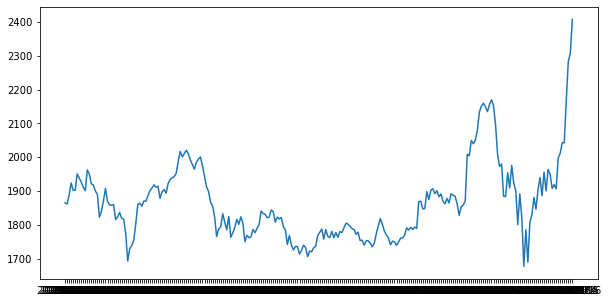

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.show()

## Dickey-Fuller 단위근 검정

In [5]:
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller
result=adfuller(data['Close'])
print(result)

(-1.3767742252801622, 0.5933588180241108, 9, 242, {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}, 2330.001481538131)


검정통계량은 -1.376, p-value는 0.5933이다.

0.05보다 크므로 귀무가설을 기각하지 못한다. 그러므로 일일 종가는 비정상성과정이다.

## 자기상관함수와 편자기상관함수

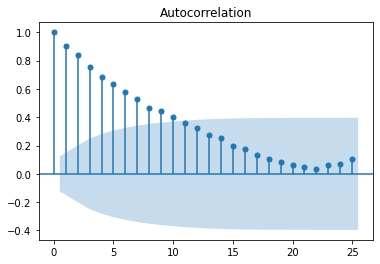

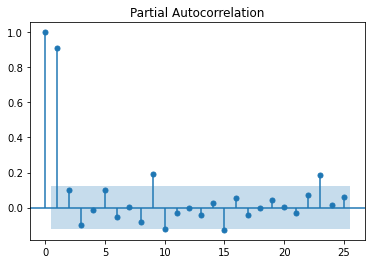

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Close'])
plot_pacf(data['Close'])
plt.show()

acf가 선형적으로 느리게 감소하다가 증가하므로 일일 종가는 비정상시계열이다

## 차분(로그 수익률)을 통해 정상시계열로 전환

             Open        High         Low       Close   Adj Close      Volume
count  251.000000  251.000000  251.000000  251.000000  251.000000  251.000000
mean     0.000897    0.001080    0.000905    0.001019    0.001019    0.005657
std      0.020894    0.016299    0.017545    0.019030    0.019030    0.347770
min     -0.075945   -0.058493   -0.072806   -0.082535   -0.082535   -0.970373
25%     -0.008895   -0.006549   -0.007209   -0.007880   -0.007880   -0.209841
50%      0.000475    0.000223    0.001132    0.000514    0.000514   -0.025878
75%      0.009870    0.007017    0.008136    0.008992    0.008992    0.200873
max      0.099056    0.093154    0.078766    0.071196    0.071196    1.919016


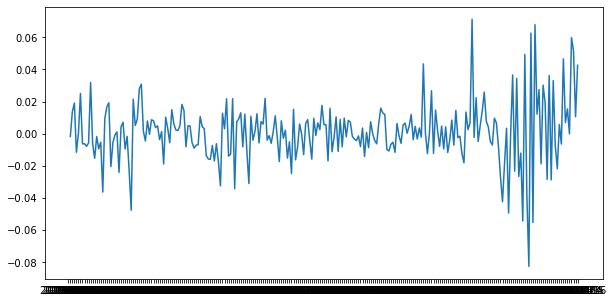

In [5]:
import numpy as np
datapct=data.pct_change()
logreturn=np.log(1+datapct)
logreturn.head()
print(logreturn.describe())

plt.figure(figsize=(10,5))
plt.plot(logreturn['Close'])
plt.show()

로그수익률의 플롯은 0을 중심으로 빠르게 움직이고 있음. 정상시계열일 가능성이 높다.

In [6]:
from statsmodels.tsa.stattools import adfuller
logreturn=logreturn.dropna() # 결측제거
result=adfuller(logreturn['Close'])
print(result)

(-3.6568739381462154, 0.004762316597490482, 8, 242, {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}, -1210.8538494804302)


p-value가 0.05보다 작아 귀무가설을 기각하고 일일 종가 로그수익률은 정상시계열임을 확인할 수 있다.

In [9]:
logreturn

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-18,-0.002245,-0.003016,-0.000516,-0.001680,-0.001680,-0.050902
2019-04-22,-0.007191,0.009364,-0.007471,0.013668,0.013668,0.204475
2019-04-23,0.019111,0.021396,0.023528,0.019134,0.019134,0.318761
2019-04-24,0.017714,0.000223,0.004530,-0.011512,-0.011512,-0.233030
2019-04-25,-0.004165,-0.003759,0.001132,0.000263,0.000263,0.506370
...,...,...,...,...,...,...
2020-04-09,0.011463,0.004393,0.003232,-0.000117,-0.000117,0.157468
2020-04-13,-0.002106,0.060023,0.010030,0.059905,0.059905,0.366526
2020-04-14,0.075721,0.050100,0.070200,0.051424,0.051424,0.185686


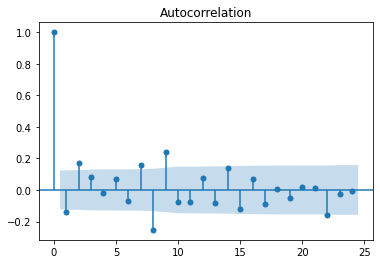

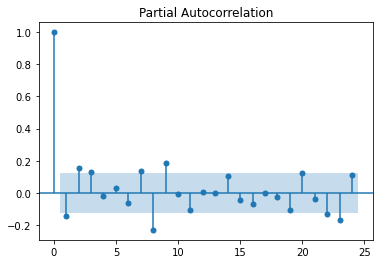

<class 'pandas.core.frame.DataFrame'>


In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(logreturn['Close'])
plot_pacf(logreturn['Close'])
plt.show()
print(type(logreturn))

acf와 pacf는 모두 절단 형태이며, p는 pacf의 최종절단값 14(또는 25)로 결정한다.

## 자료정리

In [8]:
logr1=logreturn['Close'].values # numpy 데이터로 환원
print(type(logr1))
print(logr1.shape)

logr=logr1.reshape(1,-1) # 행 벡터로 변환
print(logr.shape)

inte=14
x=[]
y=[]
for i in range(logr.shape[1]):
    if i+inte>logr.shape[1]-1:
        break
    else:
         xx=logr[0,i:i+inte]
         x.append(xx)
         yy=logr[0,i+inte]
         y.append(yy)
print(type(x))
print(type(y))

x=np.array(x)
y=np.array(y)
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

# 학습데이터와 시험데이터로 나누기
x_train=x[:210] # 처음부터 210개
x_test=x[210:] # 나머지 16개
y_train=y[:210]
y_test=y[210:]

<class 'numpy.ndarray'>
(251,)
(1, 251)
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(237, 14)
(237,)


In [10]:
x_train

array([[-0.00167986,  0.01366792,  0.01913425, ..., -0.00608736,
        -0.01526553, -0.00168282],
       [ 0.01366792,  0.01913425, -0.0115123 , ..., -0.01526553,
        -0.00168282, -0.0093776 ],
       [ 0.01913425, -0.0115123 ,  0.00026288, ..., -0.00168282,
        -0.0093776 , -0.00521922],
       ...,
       [-0.00470079, -0.00700162,  0.00969573, ...,  0.03658847,
        -0.02327864,  0.03441424],
       [-0.00700162,  0.00969573,  0.00672699, ..., -0.02327864,
         0.03441424, -0.02656658],
       [ 0.00969573,  0.00672699, -0.00791982, ...,  0.03441424,
        -0.02656658, -0.01199457]])

## 1. 자기회귀모형(autoregressive model) AR

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM
from tensorflow.keras import regularizers
model=Sequential()
model.add(Dense(1,input_shape=(14,)))

model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=30,batch_size=32)
loss_acc=model.evaluate(x_train,y_train)
los_test=model.evaluate(x_test,y_test)
print(loss_acc)
print(los_test)

Epoch 1/30
7/7 [==============================] - 0s 668us/step - loss: 9.4229e-04 - mae: 0.0212
Epoch 2/30
7/7 [==============================] - 0s 500us/step - loss: 8.7756e-04 - mae: 0.0204
Epoch 3/30
7/7 [==============================] - 0s 500us/step - loss: 6.6684e-04 - mae: 0.0188
Epoch 4/30
7/7 [==============================] - 0s 667us/step - loss: 6.7449e-04 - mae: 0.0190
Epoch 5/30
7/7 [==============================] - 0s 500us/step - loss: 8.6347e-04 - mae: 0.0207
Epoch 6/30
7/7 [==============================] - 0s 589us/step - loss: 7.9662e-04 - mae: 0.0196
Epoch 7/30
7/7 [==============================] - 0s 500us/step - loss: 7.2091e-04 - mae: 0.0187
Epoch 8/30
7/7 [==============================] - 0s 500us/step - loss: 5.7809e-04 - mae: 0.0175
Epoch 9/30
7/7 [==============================] - 0s 553us/step - loss: 7.2216e-04 - mae: 0.0190
Epoch 10/30
7/7 [==============================] - 0s 333us/step - loss: 6.2182e-04 - mae: 0.0181
Epoch 11/30
7/7 [============

## 2. MLP 모형
- 노드가 32인 MLP층 추가

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM
model=Sequential()
model.add(Dense(32,activation='relu',input_shape=(14,)))
model.add(Dense(1))                

model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=30,batch_size=32)
loss_acc=model.evaluate(x_train,y_train)
los_test=model.evaluate(x_test,y_test)
print(loss_acc)
print(los_test)

Epoch 1/30
7/7 [==============================] - 0s 667us/step - loss: 3.5642e-04 - mae: 0.0140
Epoch 2/30
7/7 [==============================] - 0s 667us/step - loss: 2.6589e-04 - mae: 0.0114
Epoch 3/30
7/7 [==============================] - 0s 612us/step - loss: 2.8590e-04 - mae: 0.0118
Epoch 4/30
7/7 [==============================] - 0s 500us/step - loss: 2.5016e-04 - mae: 0.0111
Epoch 5/30
7/7 [==============================] - 0s 500us/step - loss: 3.0587e-04 - mae: 0.0126
Epoch 6/30
7/7 [==============================] - 0s 725us/step - loss: 1.9056e-04 - mae: 0.0104
Epoch 7/30
7/7 [==============================] - 0s 500us/step - loss: 2.2174e-04 - mae: 0.0108
Epoch 8/30
7/7 [==============================] - 0s 500us/step - loss: 2.0433e-04 - mae: 0.0107
Epoch 9/30
7/7 [==============================] - 0s 713us/step - loss: 1.8043e-04 - mae: 0.0095
Epoch 10/30
7/7 [==============================] - 0s 500us/step - loss: 1.9285e-04 - mae: 0.0099
Epoch 11/30
7/7 [============

## 3. LSTM 모형 적용

In [14]:
# 입력자료를 (sample, timesteps, features)의 형태로 전환
x_train=x_train.reshape(-1,1,24)
x_test=x_test.reshape(-1,1,24)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM
model=Sequential()
model.add(LSTM(32, input_shape=(1,24)))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=30,batch_size=32)
loss_acc=model.evaluate(x_train,y_train)
los_test=model.evaluate(x_test,y_test)
print(loss_acc)
print(los_test)

Epoch 1/30
7/7 [==============================] - 1s 1ms/step - loss: 3.4073e-04 - mae: 0.0130
Epoch 2/30
7/7 [==============================] - 0s 1ms/step - loss: 3.9805e-04 - mae: 0.0134
Epoch 3/30
7/7 [==============================] - 0s 1ms/step - loss: 2.8661e-04 - mae: 0.0120
Epoch 4/30
7/7 [==============================] - 0s 904us/step - loss: 3.7264e-04 - mae: 0.0132
Epoch 5/30
7/7 [==============================] - 0s 1ms/step - loss: 3.3414e-04 - mae: 0.0125
Epoch 6/30
7/7 [==============================] - 0s 749us/step - loss: 2.7646e-04 - mae: 0.0118
Epoch 7/30
7/7 [==============================] - 0s 1ms/step - loss: 2.7600e-04 - mae: 0.0117
Epoch 8/30
7/7 [==============================] - 0s 1ms/step - loss: 3.3159e-04 - mae: 0.0122
Epoch 9/30
7/7 [==============================] - 0s 1ms/step - loss: 3.1898e-04 - mae: 0.0121
Epoch 10/30
7/7 [==============================] - 0s 833us/step - loss: 2.8583e-04 - mae: 0.0122
Epoch 11/30
7/7 [==========================

## 4. GRU 모형 적용

In [15]:
model=Sequential()
model.add(GRU(32, input_shape=(1,24)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=30,batch_size=32)
loss_acc=model.evaluate(x_train,y_train)
los_test=model.evaluate(x_test,y_test)
print(loss_acc)
print(los_test)

Epoch 1/30
7/7 [==============================] - 1s 2ms/step - loss: 5.0793e-04 - mae: 0.0163
Epoch 2/30
7/7 [==============================] - 0s 1ms/step - loss: 3.8965e-04 - mae: 0.0140
Epoch 3/30
7/7 [==============================] - 0s 1ms/step - loss: 3.9696e-04 - mae: 0.0138
Epoch 4/30
7/7 [==============================] - 0s 914us/step - loss: 3.9614e-04 - mae: 0.0137
Epoch 5/30
7/7 [==============================] - 0s 927us/step - loss: 3.6855e-04 - mae: 0.0132
Epoch 6/30
7/7 [==============================] - 0s 971us/step - loss: 2.8707e-04 - mae: 0.0119
Epoch 7/30
7/7 [==============================] - 0s 949us/step - loss: 4.2379e-04 - mae: 0.0137
Epoch 8/30
7/7 [==============================] - 0s 1ms/step - loss: 3.3056e-04 - mae: 0.0125
Epoch 9/30
7/7 [==============================] - 0s 952us/step - loss: 3.1765e-04 - mae: 0.0120
Epoch 10/30
7/7 [==============================] - 0s 1ms/step - loss: 2.6363e-04 - mae: 0.0113
Epoch 11/30
7/7 [======================

MLP 모형이 가장 성능이 좋음